In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [142]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #plt.scatter(data_test[:, 0], np.ones_like(data_test[:, 0]), color='blue', marker='+', edgecolor='blue')


In [119]:
def plot_graphic(*args, gaussian: bool = False):
    arr_c = ["red", "blue"]
    c = 0
    for xi in args:
        # Scatter plot for each set of points
        plt.scatter(x = xi, y = np.zeros(shape=(xi.shape[0],)), edgecolors = arr_c[c], facecolors = "none")
        
        if gaussian:
            # Generate x values for Gaussian with correct step size
            x_gauss = np.linspace(start = np.min(xi), stop = np.max(xi), num = xi.shape[0])
            
            # Plot Gaussian line with individual color for each xi
            plt.plot(x_gauss, gaussian_kernel_plot(x_gauss), color = arr_c[c])
        
        c += 1  # Move to the next color
    
    plt.xlabel("x1")
    plt.ylabel("y1")
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian(mean, std):
    # Generate x values from -4 to +4 standard deviations around the mean
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    
    # Calculate the y values of the Gaussian using the PDF
    y = norm.pdf(x, mean, std)
    
    # Plot the Gaussian distribution
    plt.plot(x, y, label=f"Mean = {mean}, Std Dev = {std}")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.title("Gaussian Distribution")
    plt.legend()
    plt.grid()
    plt.show()

# Example: Mean of 0 and standard deviation of 1
plot_gaussian(0, 1)
x1 = create_sample(size = 240, sdv = 0.8, displacement = (2,))
x2 = create_sample(size = 120, sdv = 0.4, displacement = (4,))

In [156]:
# Bayesian classifier function
def bayes(X_train, y_train, X_test):
    labels, counts = np.unique(y_train, return_counts=True)
    
    # Calculate prior probabilities
    for key, value in zip(labels, counts):
        if int(key) == 1:   
            pc1 = value / y_train.shape[0]  # P(C1)
        else:
            pc2 = value / y_train.shape[0]  # P(C2)
    
    # Separate training points by class
    arr_pos = []
    arr_neg = []
    for i in range(len(y_train)):
        if y_train[i] == 1:
            arr_pos.append(X_train[i])
        else:
            arr_neg.append(X_train[i])
    
    # Convert to arrays for easier manipulation
    arr_pos = np.array(arr_pos)
    arr_neg = np.array(arr_neg)

    predictions = []
    for i in range(len(X_test)):
        pos_density = np.mean([gaussian_kernel(X_test[i], xi) for xi in arr_pos])
        neg_density = np.mean([gaussian_kernel(X_test[i], xi) for xi in arr_neg])

        posterior_pos = pos_density * pc1
        posterior_neg = neg_density * pc2

        # Classify based on which posterior is higher
        if posterior_pos > posterior_neg:
            predictions.append(1)  # Predict class 1
        else:
            predictions.append(-1)  # Predict class 2

    return np.array(predictions)  # Return predictions for all test points


In [122]:
def gaussian_kernel(x, xi, bandwidth=1.0):
    # Calculates the Gaussian kernel between x and xi with bandwidth parameter
    return np.exp(-0.5 * ((x - xi) / bandwidth) ** 2) / (np.sqrt(2 * np.pi) * bandwidth)

In [123]:
def create_sample(size : int, sdv : float, displacement : np.ndarray = None):
    return (np.random.normal(scale = sdv, size = (size,)) + displacement)

In [124]:
def gaussian_kernel_plot(x):
    return np.exp(-0.5 * (x - np.mean(x))**2 / np.std(x)**2) / math.sqrt(2 * math.pi)

In [125]:
x1 = create_sample(size = 240, sdv = 0.8, displacement = (2,))
x2 = create_sample(size = 120, sdv = 0.4, displacement = (4,))

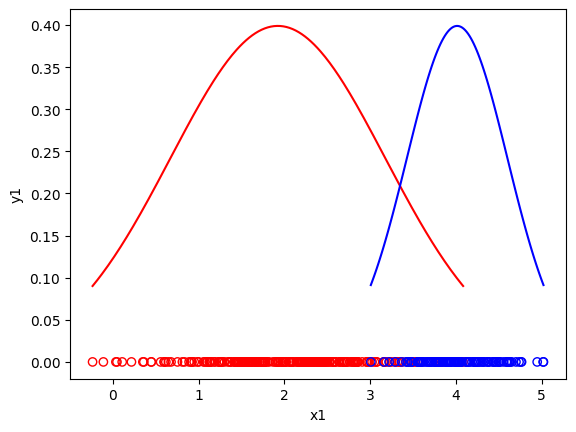

In [162]:
plot_graphic(x1, x2, gaussian = True)

In [127]:
print(f"There are {x1.shape[0]} samples of class 1 and {x2.shape[0]} samples of class 2.")

There are 240 samples of class 1 and 120 samples of class 2.


In [128]:
l1 = np.ones(shape = (x1.shape[0],))
l2 = -1*np.ones(shape = (x2.shape[0],))

l = np.concatenate((l1, l2), axis = 0)

print(np.concatenate((l[:15,],l[250 : 265,])))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [129]:
labels, counts = np.unique(l, return_counts = True)

for key, value in zip(labels, counts):
    print(f"In class {key} has {value} samples ")

In class -1.0 has 120 samples 
In class 1.0 has 240 samples 


In [130]:
x = np.concatenate((x1, x2), axis = 0)

df = pd.DataFrame({"x" : x, "labels" : l})
df.head()

,x,labels
0,4.035413,1.0
1,0.920975,1.0
2,2.698958,1.0
3,1.341524,1.0
4,2.011290,1.0


In [131]:
data = np.array(df.sample(frac = 1).reset_index(drop = True))
print(np.concatenate((data[:15,], data[250 : 265,])))

[[ 4.21622429 -1.        ]
 [ 3.58873993 -1.        ]
 [ 3.98223279 -1.        ]
 [ 1.59550094  1.        ]
 [ 4.06144708 -1.        ]
 [ 2.45340037  1.        ]
 [ 1.77286988  1.        ]
 [ 3.16124814 -1.        ]
 [ 2.31684424  1.        ]
 [ 4.11623803 -1.        ]
 [ 2.56379876  1.        ]
 [ 2.58337432  1.        ]
 [ 4.08412611  1.        ]
 [ 4.02244666 -1.        ]
 [ 1.1463889   1.        ]
 [ 2.9871742   1.        ]
 [ 1.55822628  1.        ]
 [ 3.93290606 -1.        ]
 [ 1.7381751   1.        ]
 [ 3.48525844 -1.        ]
 [ 3.59298531 -1.        ]
 [ 2.90752622  1.        ]
 [ 1.60421477  1.        ]
 [ 1.97719685  1.        ]
 [ 4.01428642 -1.        ]
 [ 2.80027185  1.        ]
 [ 2.34876973  1.        ]
 [ 2.69709429  1.        ]
 [ 1.42664949  1.        ]
 [ 2.76784545  1.        ]]


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[:, 0], data[:, 1], test_size = 0.1)

In [133]:
pred = bayes(X_train, y_train, X_test)

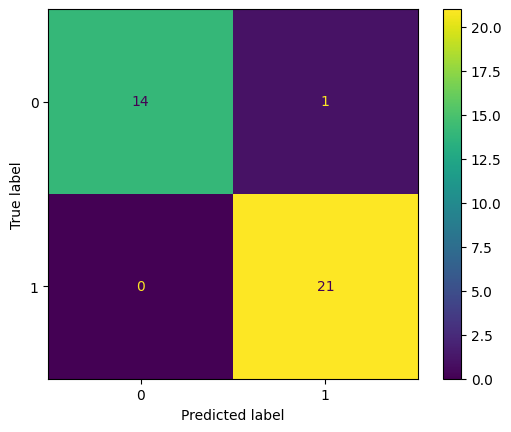

In [134]:
        from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
        cm = confusion_matrix(y_test, pred)
        display = ConfusionMatrixDisplay(confusion_matrix = cm)
        display.plot()
        plt.show()

In [135]:
X_test.shape

(36,)

In [136]:
X_train.shape

(324,)

In [137]:
X_train.shape, y_train.shape

((324,), (324,))

In [145]:
y_test

array([-1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.])

In [146]:
y_train

array([ 1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1

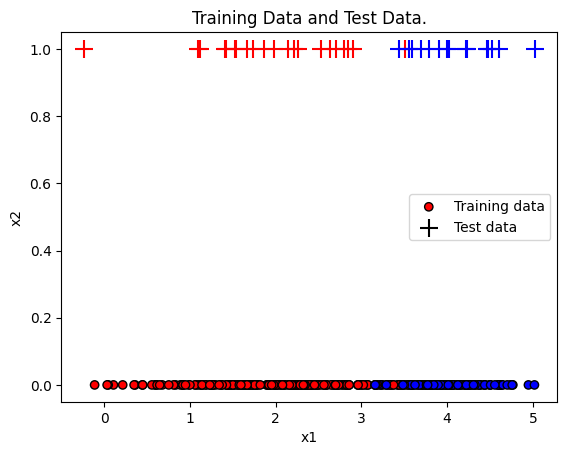

In [160]:
plot_train = np.concatenate((X_train.reshape(-1, 1), y_train.reshape(-1, 1)), axis = 1)
plot_test = np.concatenate((X_test.reshape(-1, 1), y_test.reshape(-1, 1)), axis = 1)

plot_dados_train_test(plot_train, plot_test)